<a href="https://colab.research.google.com/github/marcocolognesi/programming_class_final_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data exploration & wrangling**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Initial data exploration** (*importing files, renaming columns and dropping useless ones*)

In [2]:
original_suicide_df = pd.read_csv('master.csv')

In [3]:
suicide_df = original_suicide_df.copy()

In [4]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [7]:
suicide_df['age'].value_counts()

15-24 years    5298
35-54 years    5298
75+ years      5298
25-34 years    5298
55-74 years    5298
5-14 years     5266
Name: age, dtype: int64

By a first look at the info of our dataset we see that the columns have tricky symbols to work with with, so we rename them:

In [8]:
suicide_df.columns = ['country', 'year', 'gender', 'age', 'suicides_no', 'population', 'suicides_100k_pop', 'country_year', 'hdi_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation']

In [ ]:
#Other way
#Replace ' ' with '_' method
'''
#FIXING COLUMNS NAME
new_columns = []
for column_name in data.columns:
  new_column_name = column_name.replace(' ','_').replace('/','_').replace('-','_')
  new_columns.append(new_column_name)

data.columns = new_columns
'''

"\n#FIXING COLUMNS NAME\nnew_columns = []\nfor column_name in data.columns:\n  new_column_name = column_name.replace(' ','_').replace('/','_').replace('-','_')\n  new_columns.append(new_column_name)\n\ndata.columns = new_columns\n"

In [9]:
suicide_df.columns

Index(['country', 'year', 'gender', 'age', 'suicides_no', 'population',
       'suicides_100k_pop', 'country_year', 'hdi_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

Once the name are fixed, we see that there are a few columns that we should drop:
*   **'country_year'** , as it's useless for our analysis;
*   **'hdi_for_year'** , as it has not enough data to work with (*only 12.300 values instead of the 31.756 of the others*);
*   **'generation'**, because some values are inaccurate

In [10]:
suicide_df.drop('country_year', axis=1, inplace=True)
suicide_df.drop('hdi_for_year', axis=1, inplace=True)
suicide_df.drop('generation', axis=1, inplace=True)

In [11]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            31756 non-null  object 
 1   year               31756 non-null  int64  
 2   gender             31756 non-null  object 
 3   age                31756 non-null  object 
 4   suicides_no        30556 non-null  float64
 5   population         31756 non-null  int64  
 6   suicides_100k_pop  31756 non-null  float64
 7   gdp_for_year       31756 non-null  object 
 8   gdp_per_capita     31756 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.2+ MB


Once the columns are initially fixed we can start looking inside of each one:

In [ ]:
suicide_df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

Looking at the countries in our data (**'country'** column), we see that the United States are listed in two different ways, so we fix that:

In [12]:
suicide_df.loc[suicide_df['country'] == 'United States', 'country'] = 'United States of America'

Looking at the **'age'** column, for a better sorting we fix the 5-14 years range name:

In [13]:
suicide_df.loc[suicide_df['age'] == '5-14 years', 'age'] = '05-14 years'

## **Manipulating null values**

Looking at the info of our dataset, we see that there are **null values** only in the **'suicides_no'** column (*precisely 1200 null values*).
We can procede in two ways: either **drop** them or **fix** them.
Suicide rates are not an easily predictable number as many factors influence them and in a certain year there might be huge increases (*for example due to a big shock in the world economy*) or decreases (*for example because of a relatively stable situation*). The best decision should be to drop the nulls, however, although it may result inaccurate, for the sake of the project we decide to manipulate the values and replace the null ones with their relative mean of the previous 10 years (*same country, age group and gender*).

In [14]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            31756 non-null  object 
 1   year               31756 non-null  int64  
 2   gender             31756 non-null  object 
 3   age                31756 non-null  object 
 4   suicides_no        30556 non-null  float64
 5   population         31756 non-null  int64  
 6   suicides_100k_pop  31756 non-null  float64
 7   gdp_for_year       31756 non-null  object 
 8   gdp_per_capita     31756 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.2+ MB


### wall text of code

In [15]:
prova_df = suicide_df.copy()

In [16]:
male_mask = prova_df['gender'] == 'male'
female_mask = prova_df['gender'] == 'female'
##########################################
age_05_14_mask = prova_df['age'] == '05-14 years'
age_15_24_mask = prova_df['age'] == '15-24 years'
age_25_34_mask = prova_df['age'] == '25-34 years'
age_35_54_mask = prova_df['age'] == '35-54 years'
age_55_74_mask = prova_df['age'] == '55-74 years'
age_75_and_more_mask = prova_df['age'] == '75+ years'

In [17]:
#ANTIGUA AND BARBUDA (2018, 2019, 2020)
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Antigua and Barbuda') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Antigua and Barbuda') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#ARGENTINA (2020)
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Argentina') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Argentina') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Argentina') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#ARMENIA (2020)
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Armenia') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Armenia') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Armenia') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#BELARUS (2017, 2019, 2020)
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belarus') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belarus') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#BELGIUM (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Belgium') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Belgium') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belgium') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#BRAZIL (2020)
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brazil') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brazil') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brazil') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Belarus') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#BRUNEI (2020)
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Brunei Darussalam') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Brunei Darussalam') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#BULGARIA (2020)
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Bulgaria') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Bulgaria') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Bulgaria') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#CANADA (2020)
prova_df.loc[(prova_df['country'] == 'Canada') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Canada') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Canada') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Canada') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#CHILE (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Chile') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Chile') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Chile') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Chile') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#CHINA (2018, 2019, 2020)
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'China, Hong Kong SAR') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'China, Hong Kong SAR') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#COLOMBIA (2020)
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Colombia') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Colombia') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Colombia') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#CROATIA (2018, 2020)
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Croatia') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Croatia') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Croatia') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#CUBA (2020)
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cuba') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cuba') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cuba') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#CYPRUS (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Cyprus') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Cyprus') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Cyprus') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#DENMARK (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Denmark') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Denmark') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Denmark') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#DOMINICAN REPUBLIC (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Dominican Republic') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Dominican Republic') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Dominican Republic') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#EGYPT (2020)
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Egypt') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Egypt') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Egypt') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#EL SALVADOR (2019, 2020)
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'El Salvador') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'El Salvador') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'El Salvador') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#FINLAND (2020)
prova_df.loc[(prova_df['country'] == 'Finland') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Finland') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Finland') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Finland') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#GREECE (2020)
prova_df.loc[(prova_df['country'] == 'Greece') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Greece') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Greece') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Greece') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#GRENADA (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Grenada') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Grenada') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Grenada') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#HUNGARY (2020)
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Hungary') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Hungary') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Hungary') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#IRELAND (2017, 2019, 2020)
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ireland') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ireland') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ireland') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#ISRAEL (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Israel') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Israel') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Israel') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Israel') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#ITALY (2018, 2019, 2020)
prova_df.loc[(prova_df['country'] == 'Italy') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Italy') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Italy') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Italy') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#JAPAN (2020)
prova_df.loc[(prova_df['country'] == 'Japan') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Japan') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Japan') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Japan') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#JORDAN (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Jordan') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Jordan') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Jordan') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#KUWAIT (2020)
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kuwait') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kuwait') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kuwait') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#KYRGYZSTAN (2020)
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Kyrgyzstan') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Kyrgyzstan') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#LEBANON (2017, 2018, 2020)
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Lebanon') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Lebanon') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Lebanon') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#LUXEMBOURG (2020)
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Luxembourg') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Luxembourg') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Luxembourg') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#MALDIVES (2020)
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Maldives') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Maldives') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Maldives') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#MALTA (2018, 2019, 2020)
prova_df.loc[(prova_df['country'] == 'Malta') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Malta') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Malta') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Malta') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#MONTENEGRO (2018, 2020)
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Montenegro') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Montenegro') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Montenegro') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#NICARAGUA (2020)
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Nicaragua') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Nicaragua') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Nicaragua') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#PANAMA (2020)
prova_df.loc[(prova_df['country'] == 'Panama') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Panama') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Panama') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Panama') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#PARAGUAY (2020)
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Paraguay') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Paraguay') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Paraguay') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#PERU (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Peru') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Peru') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Peru') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Peru') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#PHILIPPINES (2020)
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Philippines') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Philippines') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Philippines') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#POLAND (2020)
prova_df.loc[(prova_df['country'] == 'Poland') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Poland') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Poland') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Poland') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#PORTUGAL (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Portugal') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Portugal') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Portugal') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#PUERTO RICO (2018, 2019, 2020)
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Puerto Rico') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Puerto Rico') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Puerto Rico') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#REPUBLIC OF KOREA (2020)
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Korea') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Korea') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Korea') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#REPUBLIC OF MOLDOVA (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Republic of Moldova') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Republic of Moldova') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#ROMANIA (2020)
prova_df.loc[(prova_df['country'] == 'Romania') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Romania') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Romania') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Romania') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#RUSSIA (2020)
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Russian Federation') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Russian Federation') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Russian Federation') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#SAINT VINCENT AND THE GRENADINES (2018, 2019, 2020)
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Saint Vincent and the Grenadines') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#SEYCHELLES (2018, 2020)
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Seychelles') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Seychelles') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Seychelles') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#SLOVAKIA (2020)
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Slovakia') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Slovakia') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Slovakia') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#SOUTH AFRICA (2019, 2020)
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'South Africa') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'South Africa') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'South Africa') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#SWEDEN 2019, 2020
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Sweden') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Sweden') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Sweden') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#SWITZERLAND (2019, 2020)
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Switzerland') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Switzerland') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Switzerland') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#TAJIKISTAN (2018, 2019, 2020)
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Tajikistan') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Tajikistan') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Tajikistan') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#THAILAND (2020)
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Thailand') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Thailand') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Thailand') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#TURKEY (2017, 2018, 2020)
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Turkey') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Turkey') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Turkey') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#UKRAINE (2020)
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Ukraine') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Ukraine') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Ukraine') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#UNITED KINGDOM (2020)
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'United Kingdom') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'United Kingdom') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'United Kingdom') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#URUGUAY (2020)
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uruguay') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uruguay') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uruguay') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

#UZBEKISTAN (2020)
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_05_14_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_05_14_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_05_14_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_05_14_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_05_14_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_05_14_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_15_24_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_15_24_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_15_24_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_15_24_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_15_24_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_15_24_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_25_34_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_25_34_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_25_34_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_25_34_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_25_34_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_25_34_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_35_54_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_35_54_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_35_54_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_35_54_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_35_54_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_35_54_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_55_74_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_55_74_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_55_74_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_55_74_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_55_74_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_55_74_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_75_and_more_mask) & (male_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_75_and_more_mask) & (male_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_75_and_more_mask) & (male_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))
prova_df.loc[(prova_df['country'] == 'Uzbekistan') & (age_75_and_more_mask) & (female_mask), 'suicides_no'] = prova_df[(prova_df['country'] == 'Uzbekistan') & (age_75_and_more_mask) & (female_mask)].fillna(np.mean(prova_df[(prova_df['country'] == 'Uzbekistan') & (age_75_and_more_mask) & (female_mask) & (prova_df['year'] >= 2010) & (prova_df['suicides_no'] >= 0)]['suicides_no']).round(decimals=0))

In [18]:
prova_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            31756 non-null  object 
 1   year               31756 non-null  int64  
 2   gender             31756 non-null  object 
 3   age                31756 non-null  object 
 4   suicides_no        31756 non-null  float64
 5   population         31756 non-null  int64  
 6   suicides_100k_pop  31756 non-null  float64
 7   gdp_for_year       31756 non-null  object 
 8   gdp_per_capita     31756 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.2+ MB


In [20]:
suicide_df_filled = prova_df.copy()

## **Creating new csv**

In [22]:
prova_df.to_csv('fixed_values.csv')

In [ ]:
suicide_df_filled = pd.read_csv('fixed_values.csv')

In [26]:
suicide_df_not_filled = suicide_df.dropna()

In [28]:
year_2016_mask = suicide_df_not_filled['year'] < 2016
suicide_df_until_2016 = suicide_df_not_filled[year_2016_mask]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27660 non-null  object 
 1   year               27660 non-null  int64  
 2   gender             27660 non-null  object 
 3   age                27660 non-null  object 
 4   suicides_no        27660 non-null  float64
 5   population         27660 non-null  int64  
 6   suicides_100k_pop  27660 non-null  float64
 7   gdp_for_year       27660 non-null  object 
 8   gdp_per_capita     27660 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


---



# **Data visualization**

We start our data visualization process by taking a look at the total rates over the years

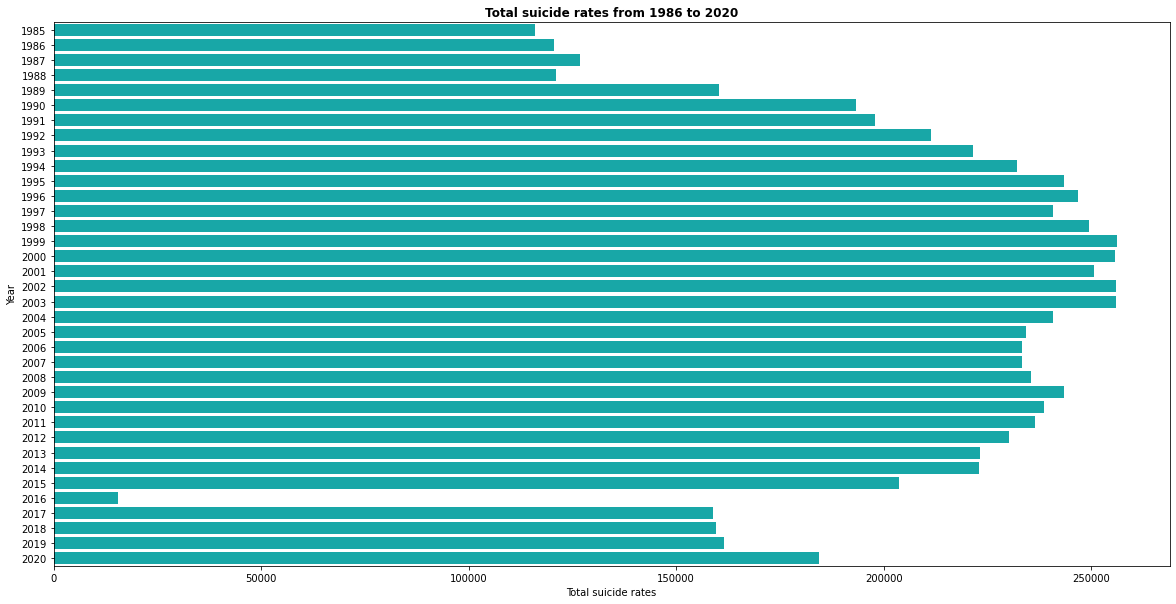

In [29]:
year_groupby_sumrates_filled = suicide_df_filled.groupby('year').suicides_no.sum()


f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = year_groupby_sumrates_filled.values , y = year_groupby_sumrates_filled.index, color = 'c', orient='h')
ax.set_title('Total suicide rates from 1986 to 2020', weight='bold')
#ax.ticklabel_format(axis = 'x', style = 'plain')
ax.set_ylabel('Year')
ax.set_xlabel('Total suicide rates')
plt.show()

Looking at the graph, we see that we had the most number of suicides around **1999** and **2002**.
* The huge decrease in 2016 is due to the fact that we have a lot less data for that year (*only 160 values*).
* From 2003 the trend looks like it's decreasing and going back to the early 1990's rates.

Now, let's dig deeper into the data and see which are the 10 countries with most suicide rates over the years, sorting also by gender and age group

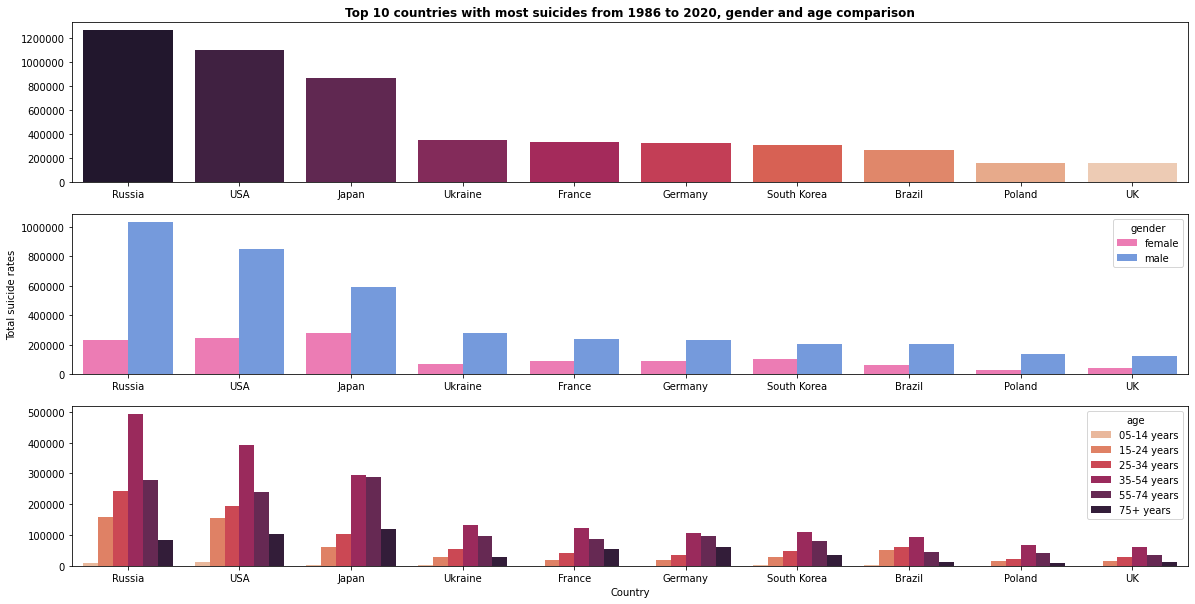

In [30]:
country_groupby_suicidesum = suicide_df_filled.groupby('country').suicides_no.sum()
countries = country_groupby_suicidesum.sort_values(ascending=False)[0:10].index
suicide_rates = country_groupby_suicidesum.sort_values(ascending=False)[0:10].values
labels = ['Russia', 'USA', 'Japan', 'Ukraine', 'France', 'Germany', 'South Korea', 'Brazil', 'Poland', 'UK']

state_list = ['Russian Federation', 'United States of America', 'Japan', 'Ukraine', 'France','Germany','Republic of Korea','Brazil', 'Poland', 'United Kingdom']
top_10_countries_most_suicides_df = suicide_df_filled.query('country in @state_list')
top_10_countries_gender_groupby_sumrates = top_10_countries_most_suicides_df.groupby(['country','gender']).suicides_no.sum()
top_10_countries_gender_groupby_sumrates_sorted = top_10_countries_gender_groupby_sumrates.reset_index().set_index('country').loc[state_list]
top_10_countries_age_groupby_sumrates = top_10_countries_most_suicides_df.groupby(['country','age']).suicides_no.sum()
top_10_countries_age_groupby_sumrates_sorted = top_10_countries_age_groupby_sumrates.reset_index().set_index('country').loc[state_list]


f, ax = plt.subplots(3,1,figsize=(20, 10))
sns.barplot(x= countries, y= suicide_rates, palette = "rocket", ax=ax[0])
ax[0].set_title('Top 10 countries with most suicides from 1986 to 2020, gender and age comparison', weight='bold')
ax[0].ticklabel_format(axis = 'y', style = 'plain')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xticklabels(labels)
#######
sns.barplot(x= top_10_countries_gender_groupby_sumrates_sorted.index, y= 'suicides_no', hue='gender', data= top_10_countries_gender_groupby_sumrates_sorted, palette=('hotpink','cornflowerblue'), ax=ax[1])
ax[1].ticklabel_format(axis = 'y', style = 'plain')
ax[1].set_ylabel('Total suicide rates')
ax[1].set_xlabel('')
ax[1].set_xticklabels(labels)
#######
sns.barplot(x= top_10_countries_age_groupby_sumrates_sorted.index, y= 'suicides_no', hue='age', data= top_10_countries_age_groupby_sumrates_sorted, palette='rocket_r', ax=ax[2])
ax[2].set_ylabel('')
ax[2].set_xlabel('Country')
ax[2].set_xticklabels(labels)

plt.show()

Looking at the plot, we see that the most suicides occurred in Russia and USA, but we need to take into consideration that those countries are some of the biggest in the world and with more population than the others, so it's normal to see them on top. 
Also, it's important to note that we don't have reliable data for a lot of important countries such as China and India but also for most of the african ones.
* The gender comparison shows us that in every country we had more male suicides than female ones. In the top 10 countries, Japan seems to be the country with most female suicides.
* The age group comparison shows us that in each of the countries in this list, most of the rates occurred in the 35-54 age group. From this comparison we see also that Japan has the most rates within the 15-24 and 55-74 age group. Also it seems that Brazil has a strangely high rate in the 15-24 age group.

Now that we saw the top 10 countries with the most rates, let's see which are the top 10 countries with most rates/100k inhabitants to check if the two charts are similar.

**N.B. Let's keep in mind that this chart is gonna be more inaccurate than the previous one as, due to some innacurate population rates in the dataset, we can't fix the 0 rates/100k coming from the null values we fixed before**


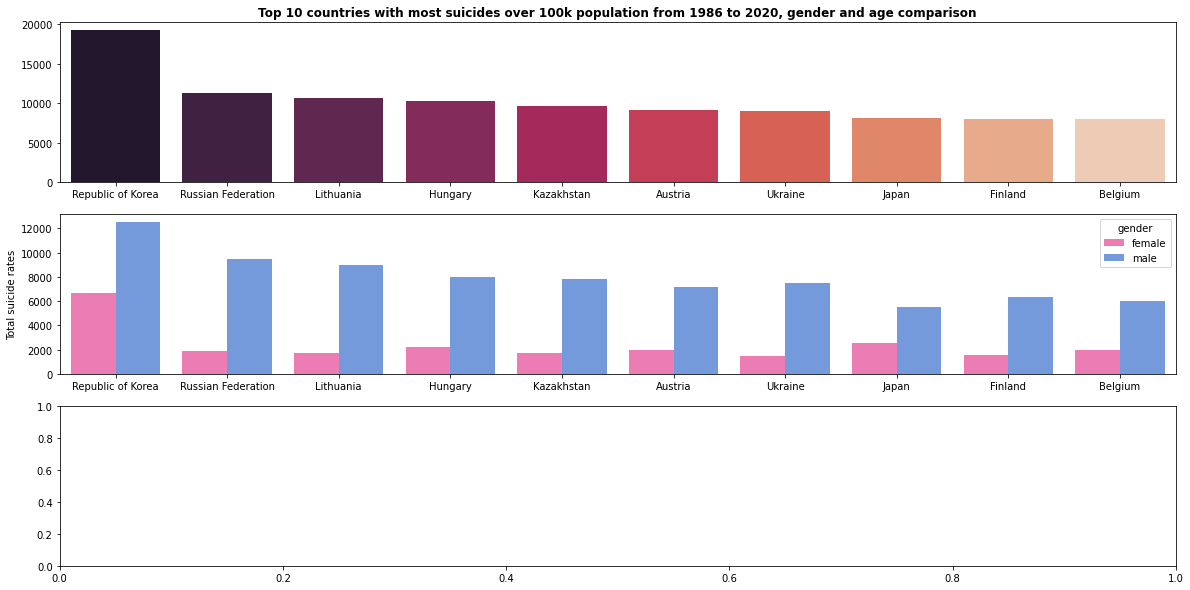

In [ ]:
country_groupby_suicide100ksum_df = suicide_df.groupby('country').suicides_100k_pop.sum().sort_values(ascending=False)[0:10]
state_list2 = ['Republic of Korea', 'Russian Federation', 'Lithuania', 'Hungary', 'Kazakhstan', 'Austria', 'Ukraine', 'Japan', 'Finland', 'Belgium']
top_10_countries_most_suicides100kpop_df = suicide_df.query('country in @state_list2')
top_10_countries_most_suicides100kpop_gender_groupby_sum_df = top_10_countries_most_suicides100kpop_df.groupby(['country', 'gender']).suicides_100k_pop.sum()
top_10_countries_most_suicides100kpop_gender_groupby_sum_df_sorted = top_10_countries_most_suicides100kpop_gender_groupby_sum_df.reset_index().set_index('country').loc[state_list2]


f, ax = plt.subplots(3,1,figsize=(20, 10))
sns.barplot(x= country_groupby_suicide100ksum_df.index, y= country_groupby_suicide100ksum_df.values, palette = "rocket", ax=ax[0])
ax[0].set_title('Top 10 countries with most suicides over 100k population from 1986 to 2020, gender and age comparison', weight='bold')
ax[0].ticklabel_format(axis = 'y', style = 'plain')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
###########################
sns.barplot(x= top_10_countries_most_suicides100kpop_gender_groupby_sum_df_sorted.index, y= 'suicides_100k_pop', hue='gender', data= top_10_countries_most_suicides100kpop_gender_groupby_sum_df_sorted, palette=('hotpink','cornflowerblue'), ax=ax[1])
ax[1].ticklabel_format(axis = 'y', style = 'plain')
ax[1].set_ylabel('Total suicide rates')
ax[1].set_xlabel('')
###########################

plt.show()

# **Machine learning model**

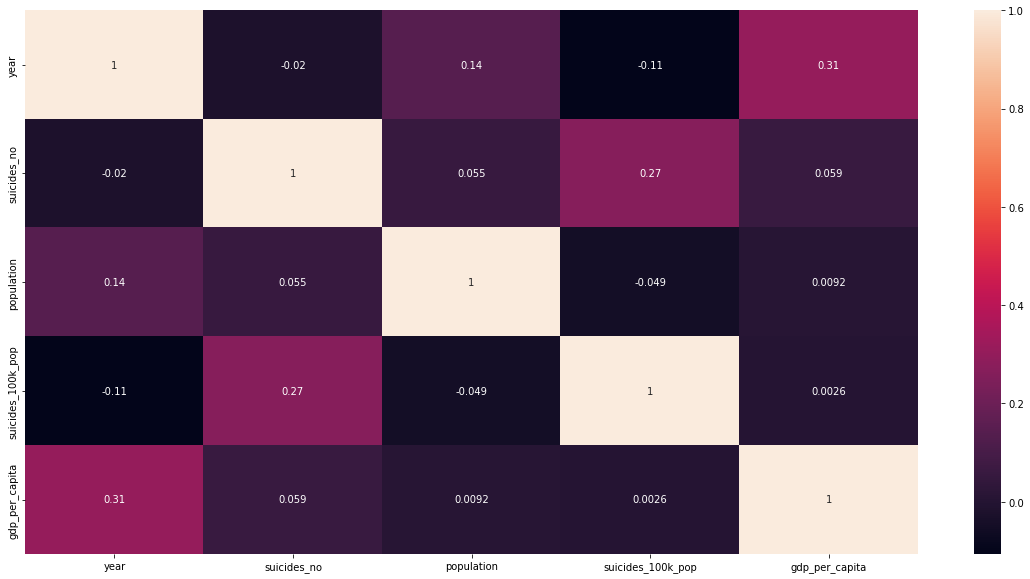

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(suicide_df.corr(), annot=True)
plt.show()

## **Clustering population vs GDP per capita**

In [ ]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            31756 non-null  object 
 1   year               31756 non-null  int64  
 2   gender             31756 non-null  object 
 3   age                31756 non-null  object 
 4   suicides_no        31756 non-null  float64
 5   population         31756 non-null  int64  
 6   suicides_100k_pop  31756 non-null  float64
 7   gdp_for_year       31756 non-null  object 
 8   gdp_per_capita     31756 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.2+ MB


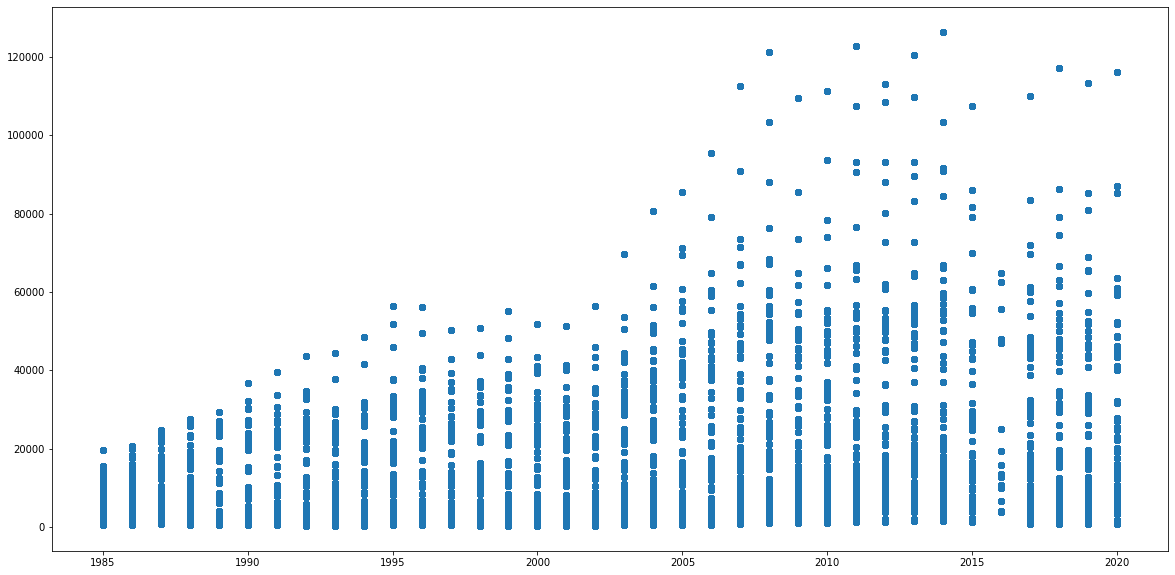

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=suicide_df['year'], y=suicide_df['gdp_per_capita'])
#plt.xlabel('income')
#plt.ylabel('spending_score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
square_distances = []
x = suicide_df[['year', 'gdp_per_capita']]
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x)
    square_distances.append(km.inertia_)


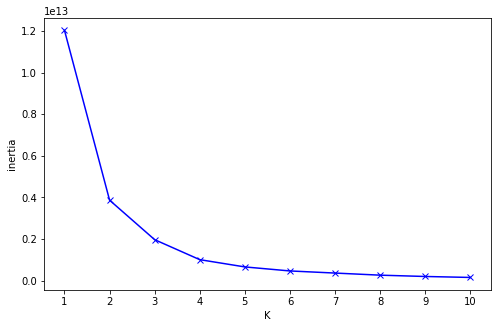

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), square_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('inertia')
plt.xticks(list(range(1,11)))
plt.show()

In [ ]:
km = KMeans(n_clusters=3, random_state=42)
y_pred = km.fit_predict(x)

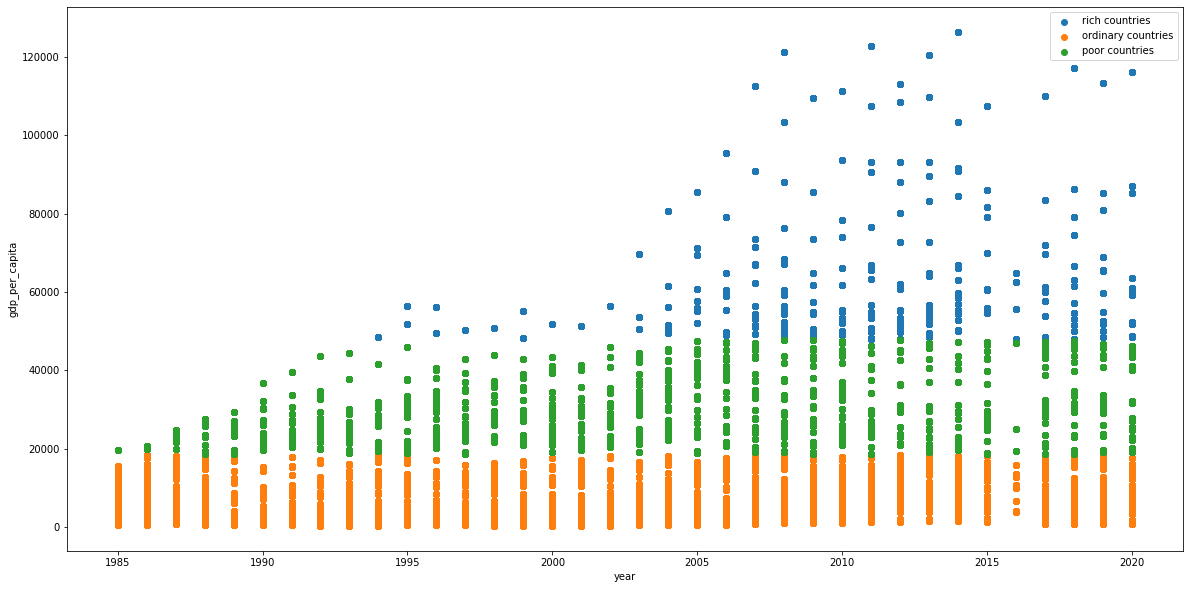

In [ ]:
plt.figure(figsize=(20,10))
labels = ['rich countries', 'ordinary countries', 'poor countries']
for i in range(3):
    plt.scatter(x.loc[y_pred==i, 'year'], x.loc[y_pred==i, 'gdp_per_capita'], label=labels[i]) 
plt.xlabel('year')
plt.ylabel('gdp_per_capita')
plt.legend()
plt.show()

## **Clustering Suicide rates vs GDP per capita**

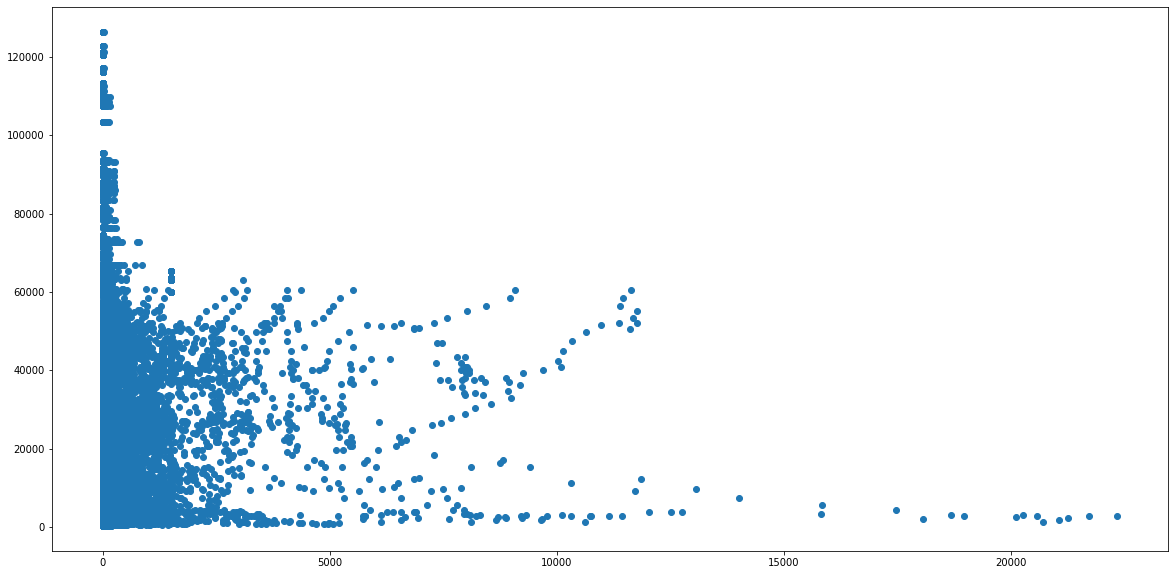

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=suicide_df['suicides_no'], y=suicide_df['gdp_per_capita'])
#plt.xlabel('income')
#plt.ylabel('spending_score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

square_distances = []
x = suicide_df[['suicides_no', 'gdp_per_capita']]
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x)
    square_distances.append(km.inertia_)


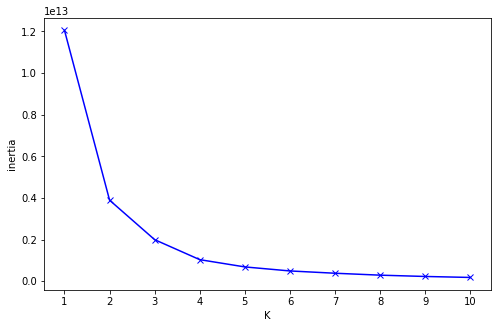

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), square_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('inertia')
plt.xticks(list(range(1,11)))
plt.show()

In [ ]:
km = KMeans(n_clusters=2, random_state=42)
y_pred = km.fit_predict(x)

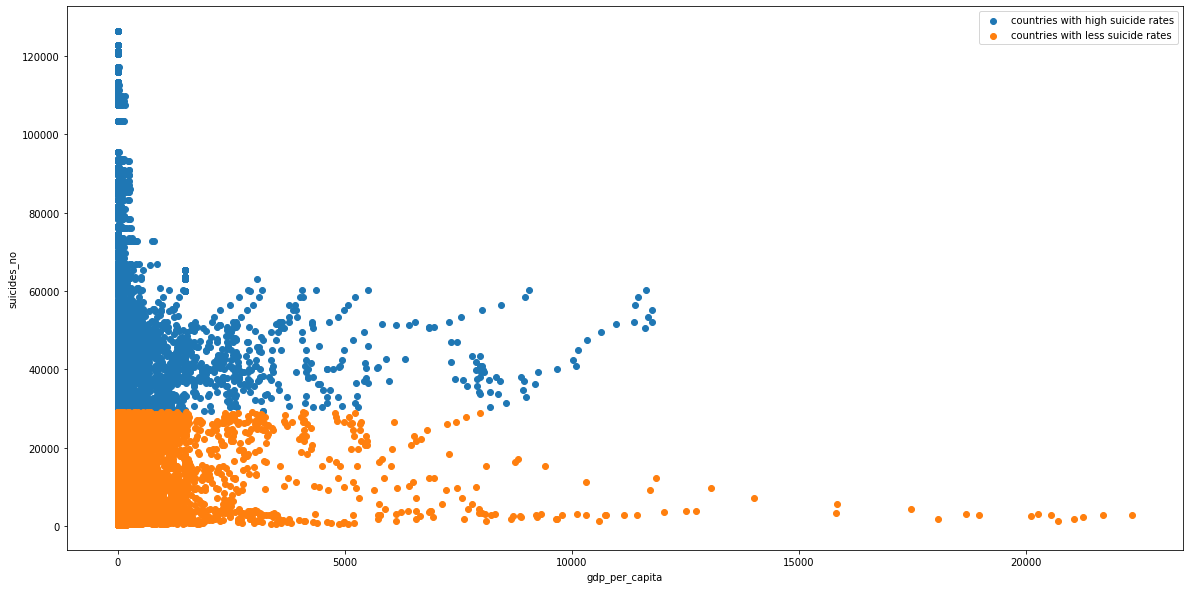

In [ ]:
plt.figure(figsize=(20,10))
labels = ['countries with high suicide rates', 'countries with less suicide rates']
for i in range(2):
    plt.scatter(x.loc[y_pred==i, 'suicides_no'], x.loc[y_pred==i, 'gdp_per_capita'], label=labels[i])
plt.ylabel('suicides_no')
plt.xlabel('gdp_per_capita')
plt.legend()
plt.show()